<a href="https://colab.research.google.com/github/TWHessNM/DSBC-exercises/blob/main/Project_6_Timothy_Hess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6




## Problem Definition
Use deep learning to differentiate images of cats and dogs.



##Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import tensorflow.keras as keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
if tf.test.gpu_device_name():
    print('GPU device found')
    print('GPU name:', tf.test.gpu_device_name())
else:
    print("No GPU device found")

GPU device found
GPU name: /device:GPU:0


## Data Collection

* Load pickled data


In [4]:
#Load X.pickle data
with open('/content/drive/MyDrive/_Data Science/Assignments/Project 6/Project 6/Data/X.pickle', 'rb') as f:
    X = pickle.load(f)

#f.close()
print(X)

[[[[ 95]
   [ 94]
   [ 98]
   ...
   [170]
   [172]
   [171]]

  [[ 92]
   [ 91]
   [ 95]
   ...
   [170]
   [172]
   [171]]

  [[ 89]
   [ 91]
   [ 92]
   ...
   [165]
   [169]
   [169]]

  ...

  [[ 84]
   [ 76]
   [ 73]
   ...
   [135]
   [164]
   [154]]

  [[ 82]
   [ 79]
   [ 71]
   ...
   [142]
   [134]
   [153]]

  [[ 80]
   [ 85]
   [ 85]
   ...
   [151]
   [146]
   [138]]]


 [[[171]
   [154]
   [139]
   ...
   [185]
   [187]
   [188]]

  [[146]
   [140]
   [129]
   ...
   [187]
   [187]
   [188]]

  [[128]
   [132]
   [128]
   ...
   [186]
   [187]
   [188]]

  ...

  [[167]
   [168]
   [162]
   ...
   [191]
   [193]
   [182]]

  [[166]
   [164]
   [164]
   ...
   [197]
   [179]
   [196]]

  [[176]
   [168]
   [173]
   ...
   [197]
   [184]
   [198]]]


 [[[121]
   [116]
   [130]
   ...
   [ 99]
   [126]
   [ 61]]

  [[122]
   [124]
   [126]
   ...
   [121]
   [ 75]
   [ 33]]

  [[128]
   [127]
   [127]
   ...
   [ 99]
   [ 99]
   [ 88]]

  ...

  [[191]
   [192]
   [192]
   

In [5]:
#Load y.pickle data
with open('/content/drive/MyDrive/_Data Science/Assignments/Project 6/Project 6/Data/y.pickle', 'rb') as f:
    y = pickle.load(f)

#f.close()
print(y)

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 

## Data Cleaning

* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [6]:
y = np.array(y)

In [7]:
type (X)

numpy.ndarray

## Exploratory Data Analysis

* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot one of the images in X using plt.imshow().

* Look at the response value in y for that image. 



In [8]:
X = X/255.0
X.shape

(24946, 100, 100, 1)

In [9]:
np.shape(X[1,:,:,0])

(100, 100)

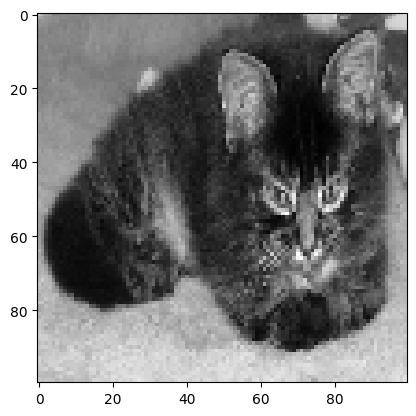

In [10]:
plt.imshow(X[1,:,:,0],cmap='gray')
plt.show()

In [11]:
y[20053]
#0 = dog
#1 = cat

0

## Data Processing

* Split X and y into training and testing sets. 

*  Build a neural network with the following: 
  * Sequential layers
  * At least two 2D convolutional layers using the ‘relu’ activation function and a (3,3) kernel size. 
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2). 
  * A dense output layer using the ‘sigmoid’ activation function. 
  Note: you can play around with the number of layers and nodes to try to get better performance.
	
* Compile your model. Use the ‘adam’ optimizer. Determine which loss function and metric is most appropriate for this problem. 

* Fit your model using the training set.

* Evaluate your model using the testing set. 

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). 

* Use the function defined above to read in the dog.jpg image that is saved in the Project 6/Data folder. 

* Use the neural network you created to predict whether the image is a dog or a cat. 



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Define keras model

In [13]:
model = Sequential()

Define first hidden layer - need to specify input shape and activation function. We are using a Dense layer, which is a fully connected layer.

In [14]:
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
585/585 [==============================] - 23s 15ms/step - loss: 0.6563 - accuracy: 0.6043
Epoch 2/8
585/585 [==============================] - 8s 13ms/step - loss: 0.5447 - accuracy: 0.7261
Epoch 3/8
585/585 [==============================] - 8s 14ms/step - loss: 0.4679 - accuracy: 0.7809
Epoch 4/8
585/585 [==============================] - 8s 13ms/step - loss: 0.4122 - accuracy: 0.8137
Epoch 5/8
585/585 [==============================] - 8s 14ms/step - loss: 0.3664 - accuracy: 0.8377
Epoch 6/8
585/585 [==============================] - 8s 14ms/step - loss: 0.3259 - accuracy: 0.8604
Epoch 7/8
585/585 [==============================] - 8s 14ms/step - loss: 0.2956 - accuracy: 0.8738
Epoch 8/8
585/585 [==============================] - 8s 14ms/step - loss: 0.2605 - accuracy: 0.8899


Define output layer

### Compile model

In [15]:
# Using binary cross entropy loss function and accuracy as metric since we are doing a binary prediction
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit model

In [16]:
# Fit model using training data
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
585/585 [==============================] - 10s 14ms/step - loss: 0.2311 - accuracy: 0.9037
Epoch 2/8
585/585 [==============================] - 9s 16ms/step - loss: 0.2104 - accuracy: 0.9136
Epoch 3/8
585/585 [==============================] - 8s 14ms/step - loss: 0.1889 - accuracy: 0.9240
Epoch 4/8
585/585 [==============================] - 8s 14ms/step - loss: 0.1626 - accuracy: 0.9345
Epoch 5/8
585/585 [==============================] - 8s 13ms/step - loss: 0.1522 - accuracy: 0.9401
Epoch 6/8
585/585 [==============================] - 8s 14ms/step - loss: 0.1307 - accuracy: 0.9484
Epoch 7/8
585/585 [==============================] - 8s 14ms/step - loss: 0.1150 - accuracy: 0.9579
Epoch 8/8
585/585 [==============================] - 8s 14ms/step - loss: 0.0984 - accuracy: 0.9623


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print (accuracy)

195/195 [==============================] - 1s 6ms/step - loss: 0.4887 - accuracy: 0.8448
0.8447971940040588


In [18]:
dog = '/content/drive/MyDrive/_Data/Copy of dog.jpg'
pic = Image.open(dog)
pix = np.array(pic.getdata())

In [19]:
def read_image(filepath):
    # Open the image file
    img = Image.open(filepath)

    # Convert the image to a 4-dimensional numpy array
    img_array = np.array(img).reshape((1, img.size[1], img.size[0], 3))

    return img_array

In [27]:
pix.shape

(106500, 3)

In [26]:
pix[0:3]

array([[170,  87,  33],
       [169,  86,  32],
       [169,  86,  32]])

In [30]:
img = Image.open('/content/drive/MyDrive/_Data/Copy of dog.jpg')
new_img = img.resize((100,100))
new_img.save('dog_resized','jpeg')

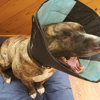

In [33]:
new_img

## Communication of Results

* Communicate the results of your analysis. 



## **BONUS** (optional)

* Upload an image of your (or your friend’s or family’s) dog or cat and use your model to predict whether the image is a dog or cat. 


In [ ]:
def read_image(filepath):
    # Open the image file
    img = Image.open(filepath)

    # Convert the image to a 4-dimensional numpy array
    img_array = np.array(img).reshape((1, img.size[1], img.size[0], 3))

    return img_array